<a href="https://colab.research.google.com/github/Enkrumah14/mannyNkrumahGenAi/blob/main/Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 24ms/step - accuracy: 0.2200 - loss: 2.1455 - val_accuracy: 0.3207 - val_loss: 1.8818
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.3058 - loss: 1.8842 - val_accuracy: 0.3367 - val_loss: 1.8210
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.3283 - loss: 1.8287 - val_accuracy: 0.3321 - val_loss: 1.8145
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.3448 - loss: 1.8017 - val_accuracy: 0.3732 - val_loss: 1.7370
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.3509 - loss: 1.7773 - val_accuracy: 0.3913 - val_loss: 1.7305
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.3589 - loss: 1.7507 - val_accuracy: 0.3942 - val_loss: 1.7071
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.3703 - loss: 1.7310 - val_accuracy: 0.3985 - val_loss: 1.6926
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.3677 -

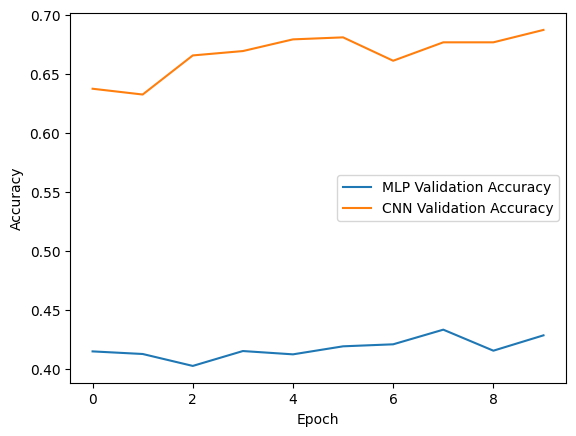

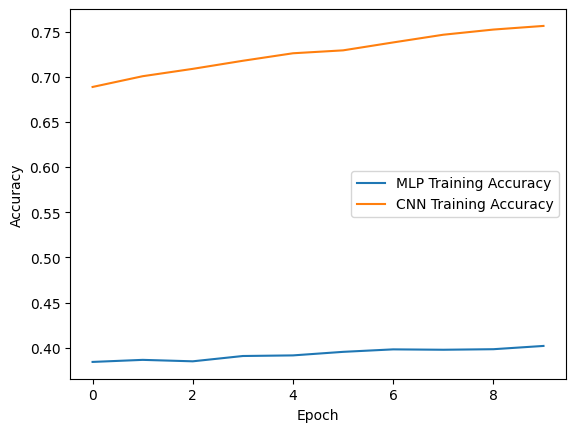

In [3]:
#author : Manny Nkrumah
#file : Problem1.ipynb
#assignment # : #2
#date : 09/26/24
#description : compare the performance of a Multi-Layer Perceptron and a Convolutional Neural Network on the CIFAR-10 dataset.

###############################################################################################################################

#import libraries for CIFAR-10 dataset:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

#import library fpr MLP:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

#import library for CNN:
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU

#import visualization library:
import matplotlib.pyplot as plt

###############################################################################################################################

#Load the CIFAR-10 dataset:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Normalize the images:
x_train, x_test = x_train / 255.0, x_test / 255.0


# MLP model:
def create_mlp_model(input_shape):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(512, activation='relu'),
        Dropout(0.2),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


mlp_model = create_mlp_model(x_train.shape[1:])
mlp_model.fit(x_train, y_train, epochs=10, validation_split=0.2)

def create_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), strides=(2, 2), padding='same', input_shape=input_shape),
        BatchNormalization(),
        ReLU(),
        Dropout(0.2),
        Conv2D(64, (3, 3), strides=(2, 2), padding='same'),
        BatchNormalization(),
        ReLU(),
        Dropout(0.2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

cnn_model = create_cnn_model(x_train.shape[1:])
cnn_model.fit(x_train, y_train, epochs=10, validation_split=0.2)

#Evaluate both models:
mlp_test_loss, mlp_test_acc = mlp_model.evaluate(x_test, y_test)
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test, y_test)

print(f"MLP Test Accuracy: {mlp_test_acc}")
print(f"CNN Test Accuracy: {cnn_test_acc}")

# Train the MLP model and capture the history:
history_mlp = mlp_model.fit(x_train, y_train, epochs=10, validation_split=0.2)

# Train the CNN model and capture the history:
history_cnn = cnn_model.fit(x_train, y_train, epochs=10, validation_split=0.2)

#Visualize results:
 #Plot validation testing:
plt.plot(history_mlp.history['val_accuracy'], label='MLP Validation Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
 #Plot training accuracy:
plt.plot(history_mlp.history['accuracy'], label='MLP Training Accuracy')
plt.plot(history_cnn.history['accuracy'], label='CNN Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

